# Homework 1 - Cars Identification

## Import libraries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
from scipy.io import loadmat

## Data Processing

In [4]:
dest_path = './data'
path = untar_data(URLs.CARS, dest=dest_path)
#!wget data/ http://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
#!tar xvzf data/car_devkit.tgz
path

PosixPath('data/stanford-cars')

In [9]:
def prepare_df(path, singles = [], doubles = []):
    annos = loadmat(path)['annotations']
    df = pd.DataFrame(annos[0])
    for item in singles:
        df[item] = df[item].apply(lambda x: x[0])
    for item in doubles:
        df[item] = df[item].apply(lambda x: x[0][0])
    return df[singles + doubles]

In [10]:
train = prepare_df('./data/stanford-cars/devkit/cars_train_annos', ['fname'], ['class'])
test = prepare_df('./data/stanford-cars/devkit/cars_test_annos', ['fname'])

train['name'] = train['fname'].apply(lambda name: './data/stanford-cars/cars_train/' + name)
test['name'] = test['fname'].apply(lambda name: './data/stanford-cars/cars_test/' + name)

del train['fname']
del test['fname']

In [11]:
train['class'] = train['class'].apply(lambda x: x-1)

meta = pd.DataFrame(loadmat('./data/stanford-cars/devkit/cars_meta.mat')['class_names'][0], columns=['class_name'])
meta['class_name'] = meta['class_name'].apply(lambda x: x[0])

train['label'] = train['class'].apply(lambda x: meta.iloc[x].class_name)
del train['class']

In [12]:
train.head()

,name,label
0,./data/stanford-cars/cars_train/00001.jpg,Audi TTS Coupe 2012
1,./data/stanford-cars/cars_train/00002.jpg,Acura TL Sedan 2012
2,./data/stanford-cars/cars_train/00003.jpg,Dodge Dakota Club Cab 2007
3,./data/stanford-cars/cars_train/00004.jpg,Hyundai Sonata Hybrid Sedan 2012
4,./data/stanford-cars/cars_train/00005.jpg,Ford F-450 Super Duty Crew Cab 2012


In [13]:
test.head()

,name
0,./data/stanford-cars/cars_test/00001.jpg
1,./data/stanford-cars/cars_test/00002.jpg
2,./data/stanford-cars/cars_test/00003.jpg
3,./data/stanford-cars/cars_test/00004.jpg
4,./data/stanford-cars/cars_test/00005.jpg


In [21]:
data = ImageDataBunch.from_df('', train, ds_tfms=get_transforms(), size=(128,192), bs=64).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 128, 192),Image (3, 128, 192),Image (3, 128, 192),Image (3, 128, 192),Image (3, 128, 192)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012
Path: .;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 128, 192),Image (3, 128, 192),Image (3, 128, 192),Image (3, 128, 192),Image (3, 128, 192)
y: CategoryList
BMW 3 Series Wagon 2012,Chevrolet Cobalt SS 2010,Chevrolet Corvette Ron Fellows Edition Z06 2007,AM General Hummer SUV 2000,Audi TT Hatchback 2011
Path: .;

Test: None

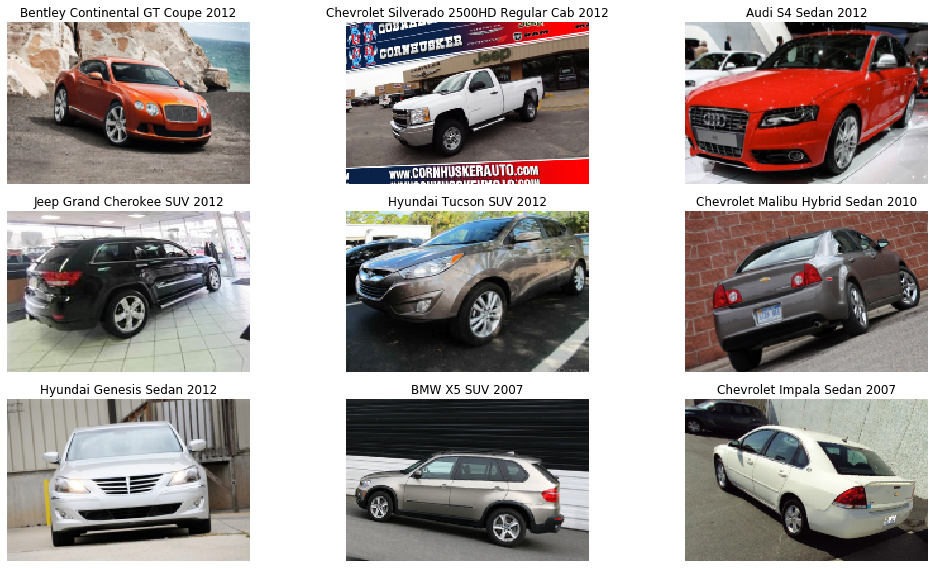

In [22]:
data.show_batch(rows=3, figsize=(14,8))

In [24]:
print(data.classes)
len(data.classes)

['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW Z4 Convertible 2012

196

## Training

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [26]:
learn.model_dir = './models/'

In [27]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [28]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,6.193436,4.596762,0.902948,00:32
1,4.703575,3.810403,0.832924,00:32
2,3.718860,3.449994,0.778256,00:33
3,3.145412,3.380019,0.770885,00:33


In [29]:
learn.save('hw1-cars-benchmark')

## Results

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

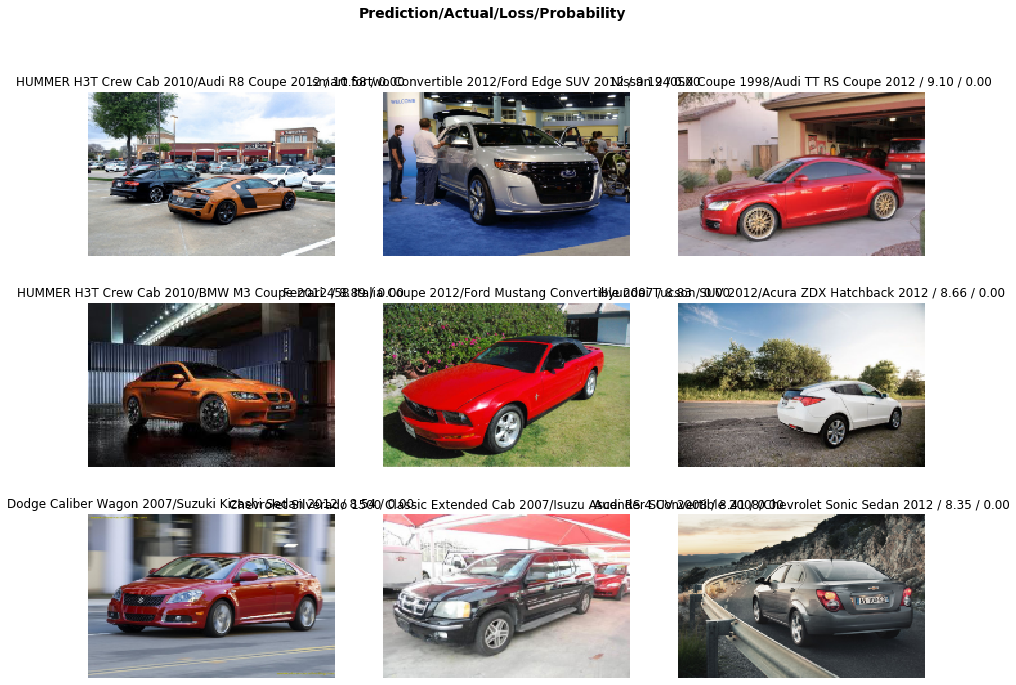

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

In [33]:
#interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
interp.most_confused(min_val=4)

[('Dodge Sprinter Cargo Van 2009', 'Mercedes-Benz Sprinter Van 2012', 6),
 ('Chevrolet Express Cargo Van 2007', 'Chevrolet Express Van 2007', 5),
 ('Chevrolet Express Cargo Van 2007', 'GMC Savana Van 2012', 4),
 ('Hyundai Azera Sedan 2012', 'Hyundai Genesis Sedan 2012', 4)]

## RESNET50

In [53]:
data = ImageDataBunch.from_df('', train, ds_tfms=get_transforms(), size=(128,192), bs=64).normalize(imagenet_stats)

In [54]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 4.79E-03


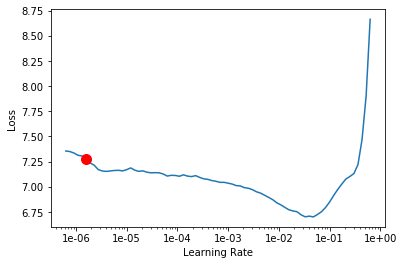

In [55]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [56]:
#learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-03,1e-01))

epoch,train_loss,valid_loss,accuracy,time
0,5.255904,4.249906,0.145577,00:34
1,4.371853,5.052611,0.118550,00:34
2,6.713873,6.711601,0.073096,00:34
3,7.245176,11.479300,0.076781,00:34
4,6.327765,22.970053,0.136364,00:34
5,5.102672,14.863444,0.187346,00:34
6,4.009402,21.870275,0.298526,00:35
7,3.150390,14.003591,0.372850,00:34
8,2.507980,27.017820,0.431818,00:34
9,2.164395,24.762592,0.458845,00:34


In [57]:
learn.save('hw1-cars-restnet50_1')